# Project: Investigate FBI Gun Data
###### Part 2

## Table of Contents
<ul>
<li><a href="#eda">Questions & Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#q1">Question 1</a></li>
        <li><a href="#q24">Question 2 & 4</a></li>
        <li><a href="#q3">Question3</a></li>
        <li><a href="#q5">Question5</a></li>
    </ul>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='eda'></a>
## Questions & Exploratory Data Analysis

After all cleaning and simpilifying process, following questions are going to be answered.

In [1]:
# loding final dataset and necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# reading the final file which we developed at the end of data wrangling phase
df_final = pd.read_csv('final_data.csv')

In [3]:
# raeding the columns for using their name
df_final.columns

Index(['state', 'totals_2015', 'totals_2016', 'gpercent_2010_to_2016',
       'gtotals_2011_to_2015', 'population_2016', 'percent_2010_to_2016',
       'pwhite_2016', 'pblack_2016', 'phispanic_2016', 'vet_2011_to_2015',
       'pedu_2011_to_2015', 'emp_2015', 'dpayroll_2015'],
      dtype='object')

### Questions

1. what is comparation between population growth percentage from 2010 to 2016 and gun during this period? Which states have max and min in population growth and gun during 2010 to 2016 and 2016?
2. What is relation between population diversity in diffirent states with total gun in 2016:
        2.1.  White population
        2.2.  Black population
        2.3.  hispanic population
3. Does veteran population has meaning effect on gun, based on numbers of 2011 to 2015?
4. Does education has has meaning effect on gun, based on numbers of 2011 to 2015?
5. What is relation between employee and payroll with number of gun in 2015?

<a id='q1'></a>
##### Question 1: Comparing population and Gun growth during years 2010 to 2016
The first step for answer to this question is to bring all data of these two columns alongside of each other by bar chart to see how they stand next each other. The used technic for bar chart, was learned from casestudy 2

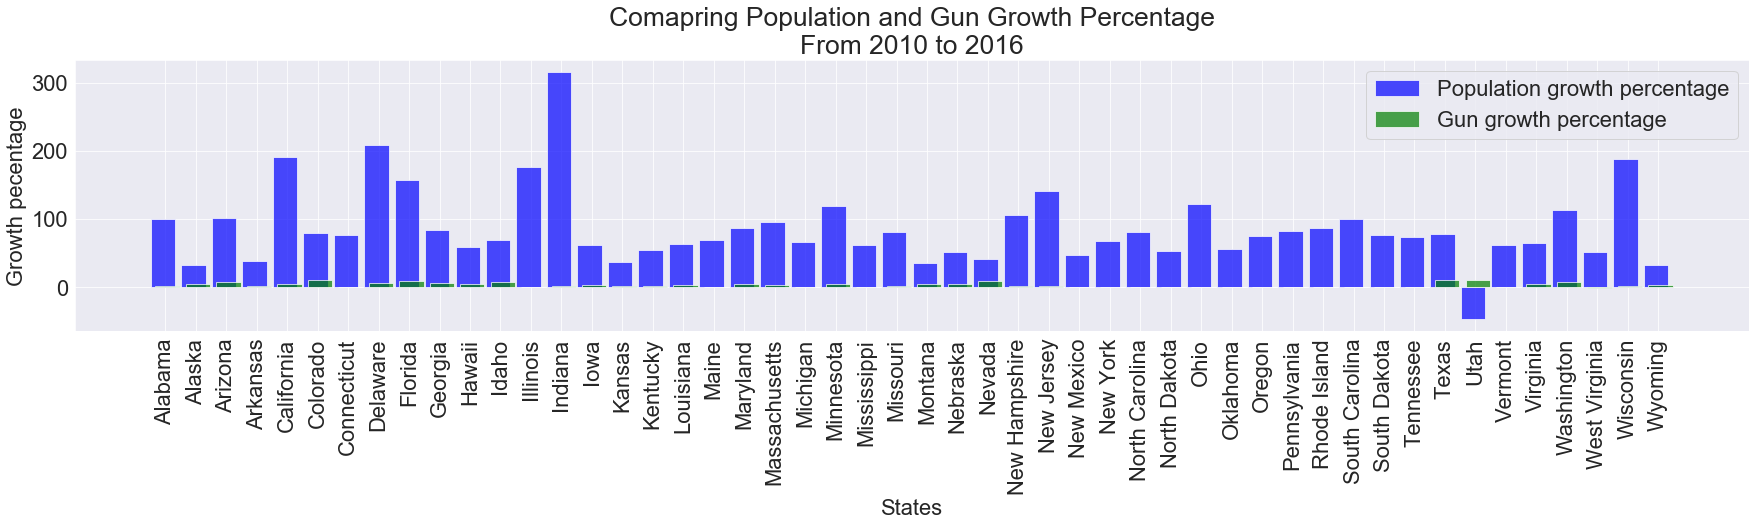

In [57]:
# The following code drow both columns in one figure
ind = np.arange(len(df_final.state))
w = 0.15
pbar = plt.bar(ind, df_final['gpercent_2010_to_2016'],color='b',alpha=.7,label='Population growth percentage')
gbar = plt.bar(ind + w, df_final['percent_2010_to_2016'],color='g',alpha=.7, label='Gun growth percentage')
plt.xlabel('States')
plt.ylabel('Growth pecentage')
plt.title('Comapring Population and Gun Growth Percentage\nFrom 2010 to 2016')
labels = df_final.state
locations = ind+w/2
plt.xticks(locations, labels,rotation=90)
plt.rcParams["figure.figsize"] = [30,5]
plt.rcParams.update({'font.size': 22})
plt.legend();

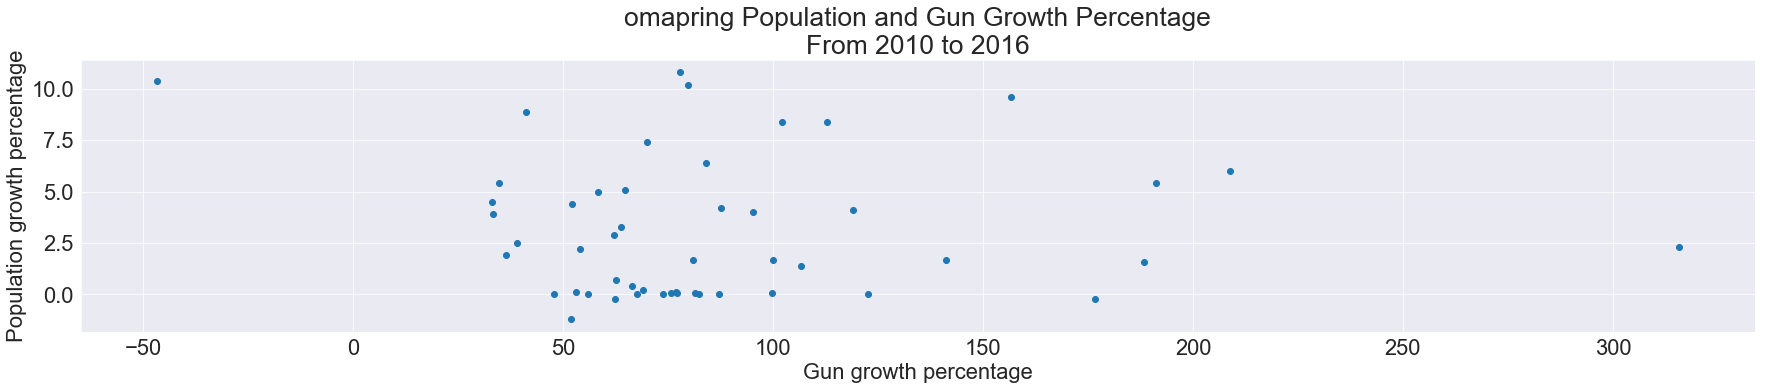

In [58]:
# lets compaire both data by scatter chart
plt.scatter(df_final.gpercent_2010_to_2016,df_final.percent_2010_to_2016)
plt.ylabel('Population growth percentage')
plt.xlabel('Gun growth percentage')
plt.title('omapring Population and Gun Growth Percentage\nFrom 2010 to 2016');

*As bar chart and scatter plot show, population growth percentage and gun growth percentage have not any meaningful relation, especially in scatter plot, data are not coherent together. Let see these data again by line chart to find out how fluctuation and change data in these two set are related*

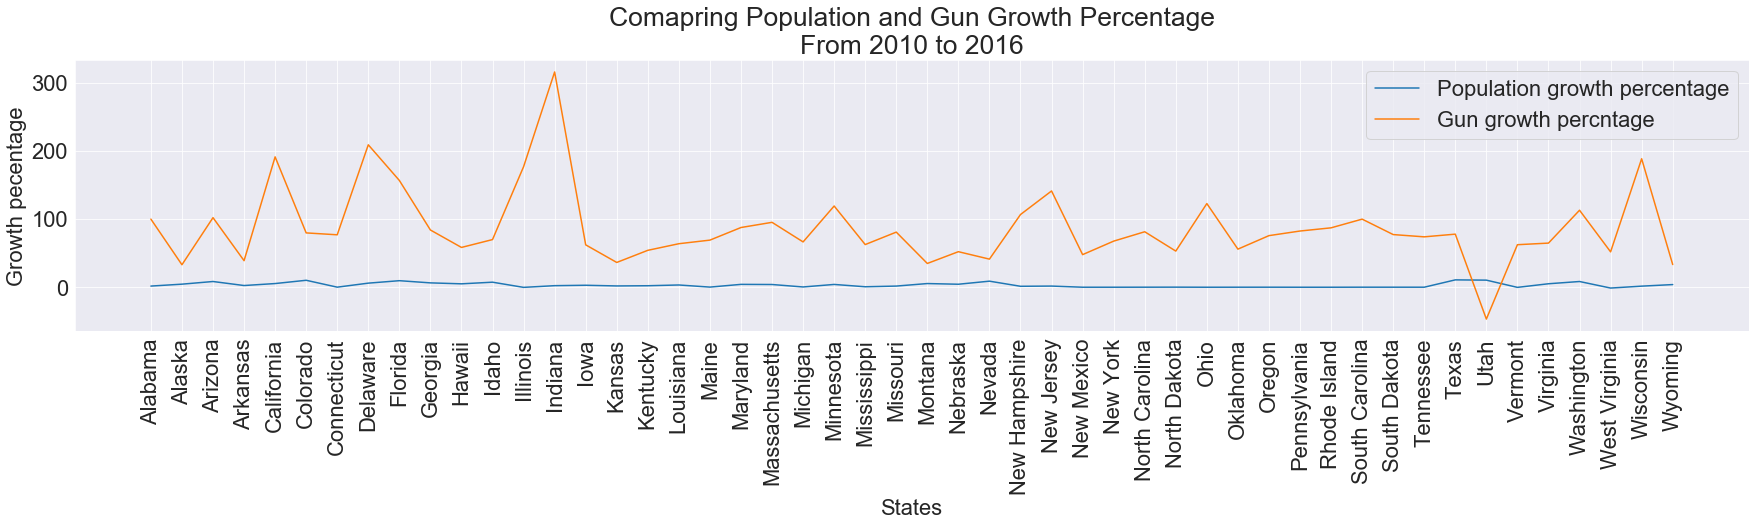

In [59]:
# drowing two columns by line chart in one figure to see how the diffrences are
plt.plot(df_final.state,df_final.percent_2010_to_2016, label='Population growth percentage')
plt.plot(df_final.state,df_final.gpercent_2010_to_2016, label='Gun growth percntage')
plt.xlabel('States')
plt.ylabel('Growth pecentage')
plt.title('Comapring Population and Gun Growth Percentage\nFrom 2010 to 2016')
plt.legend()
plt.xticks(labels,rotation=90);

*Both above graphs shows, the percentage growth of gun in all states (but one, Utah), are much much greater than population growth percentage in same time. So, it seems there are not any logical relation together. The population growth is like a line in front of gun growth from 2010 to 2016 in 50 sates and up and down of population growth percent doesn't have any link to gun growth percent.
So, let see does maximum and minimum in these two sets, population growth percent and gun growth percent from 2010-2016, has any state in common or not.*

In [60]:
# Maximum percentage of growth in population from 2010 to 2016
df_final.state.loc[df_final['percent_2010_to_2016']==df_final.percent_2010_to_2016.max()]

42    Texas
Name: state, dtype: object

In [61]:
# Minimum percentage of growth in population from 2010 to 2016
df_final.state.loc[df_final['percent_2010_to_2016']==df_final.percent_2010_to_2016.min()]

47    West Virginia
Name: state, dtype: object

In [62]:
# Maximum percentage of growth in gun from 2010 to 2016
df_final.state.loc[df_final['gpercent_2010_to_2016']==df_final.gpercent_2010_to_2016.max()]

13    Indiana
Name: state, dtype: object

In [63]:
# Minimum percentage of growth in gun from 2010 to 2016
df_final.state.loc[df_final['gpercent_2010_to_2016']==df_final.gpercent_2010_to_2016.min()]

43    Utah
Name: state, dtype: object

In [64]:
df_final.gpercent_2010_to_2016.describe()

count     50.000000
mean      86.685446
std       56.145829
min      -46.684348
25%       56.493465
50%       76.284043
75%       99.900642
max      315.658904
Name: gpercent_2010_to_2016, dtype: float64

In [65]:
df_final.percent_2010_to_2016.describe()

count    50.000000
mean      3.119400
std       3.368069
min      -1.200000
25%       0.062500
50%       2.050000
75%       5.075000
max      10.800000
Name: percent_2010_to_2016, dtype: float64

*Population and gun growth percentage, do not have any common state in common in minimum and maximum even.
All in all can say, there is not kind of strong relation between these to sets*

<a id='q24'></a>
##### Question 2 & 4: Race population and education percentage relation with Gun

<p>Answering to These questions is a little tricky. There are 2 ways for comparing race and education population data with gun data, quantitative and qualitative. For first one, because lack of data of numbers of people who buy guns(we have number of permits in total) we cannot calculate the percentage of people who buy gun per states and for that cannot make a same scale for our data to do accrue analysis. So, we should take the second way, qualitative.</p>
<p>For that first we calculate a new measure named gun per capita, which is result of number of total gun data to population for each state. With that we normalized gun data. Then categorized these new calculated data, in for qualitative levels, ‘High’, 'Moderately High’, 'Medium', 'Low'.</p>
<p>We do the same leveling for race and education population. After making same scale for data, we compare to each other.</p>
<p>There is one limitation on education data from census data set, which the data belong to 2011 to 2015 years and no 2016, so with tolerance use the data for comparing gun per capita 2016.</p>

In [66]:
# Creating a new column, gpc_2016, for gun per capita in 2016
df_final['gpc_2016']=(df_final.totals_2016/df_final.population_2016)

In [67]:
# test the new column, gun per capita
df_final.gpc_2016.head()

0    0.126858
1    0.118140
2    0.060060
3    0.089020
4    0.060565
Name: gpc_2016, dtype: float64

*getting min and max of gun per capita , just for information*

In [68]:
df_final.state.loc[df_final['gpc_2016']==df_final.gpc_2016.max()]

16    Kentucky
Name: state, dtype: object

In [69]:
df_final.state.loc[df_final['gpc_2016']==df_final.gpc_2016.min()]

10    Hawaii
Name: state, dtype: object

*It shows in Kentucky, for each 10 persons, there are 8.3 guns, but in Hawaii for each 100 persons 1.1 gun*

*all following codes creates bins level and edges for creating new columns for bins level for gun per capita and race and education population*

In [70]:
# Name each level category
bin_names = ['High' ,'Moderately High' ,'Medium' ,'Low' ]

In [71]:
# Bin edges for gun per capita that will be used to "cut" the data into groups
bin_edges_gpc = [0.011676,0.060872,0.083753,0.102326,0.828684]

In [72]:
# Creates gun per capita levels column
df_final['gpc_levels'] = pd.cut(df_final['gpc_2016'], bin_edges_gpc, labels=bin_names)

In [73]:
# Bin edges for white population percentage that will be used to "cut" the data into groups
bin_edges_w = [0.670000,34.175000,77.400000,87.275000,94.810000]

In [74]:
# Bin edges for black population percentage that will be used to "cut" the data into groups
bin_edges_b = [-0.000001,0.650000,4.700000,12.400000,37.710000]

In [75]:
# Bin edges for latino population percentage that will be used to "cut" the data into groups
bin_edges_h = [-0.000001,1.525000,6.250000,11.575000,39.110000]

In [76]:
# Bin edges for High school graduate or higher, percent of persons age 25 years+, 2011-2015 that will be used to 
# "cut" the data into groups
bin_edges_e = [0.830000,81.825000,87.850000,90.625000,92.810000]

In [77]:
# Creates white percentage levels column based on quantitative variable
df_final['w_levels'] = pd.cut(df_final['pwhite_2016'], bin_edges_w, labels=bin_names)

In [78]:
# Creates black percentage levels column based on quantitative variable
df_final['b_levels'] = pd.cut(df_final['pblack_2016'], bin_edges_b, labels=bin_names)

In [79]:
# Creates gun per capita levels column based on quantitative variable
df_final['h_levels'] = pd.cut(df_final['phispanic_2016'], bin_edges_h, labels=bin_names)

In [80]:
# Creates gun per capita levels column based on quantitative variable
df_final['edu_levels'] = pd.cut(df_final['pedu_2011_to_2015'], bin_edges_e, labels=bin_names)

<span style="color:purple">(at first try, cut function ignore lowest and upper number of beans edge, so I change the numbers to have all value. Why doesn't cut calculate beans edge lower and upper level boundary?)</span>

In [81]:
# checking counts of new columns for integraty
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 24 columns):
state                    50 non-null object
totals_2015              50 non-null int64
totals_2016              50 non-null int64
gpercent_2010_to_2016    50 non-null float64
gtotals_2011_to_2015     50 non-null int64
population_2016          50 non-null int64
percent_2010_to_2016     50 non-null float64
pwhite_2016              50 non-null float64
pblack_2016              50 non-null float64
phispanic_2016           50 non-null float64
vet_2011_to_2015         50 non-null int64
pedu_2011_to_2015        50 non-null float64
emp_2015                 50 non-null int64
dpayroll_2015            50 non-null int64
gpc_2016                 50 non-null float64
vpc_2011_2015            50 non-null float64
empc_2015                50 non-null float64
ppc_2015                 50 non-null float64
payroll_levels           50 non-null category
gpc_levels               50 non-null category
w_levels  

*Ok, or dataset does not have any missing. Now checking how states distributed in new leveling columns*

In [82]:
# percentage of value counts in gun per capita level
df_final['gpc_levels'].value_counts(normalize=True)

Low                0.26
High               0.26
Medium             0.24
Moderately High    0.24
Name: gpc_levels, dtype: float64

In [83]:
# percentage of value counts in white percent level
df_final.w_levels.value_counts(normalize=True)

Low                0.26
High               0.26
Medium             0.24
Moderately High    0.24
Name: w_levels, dtype: float64

In [84]:
# percentage of value counts in black percent level
df_final.b_levels.value_counts(normalize=True)

Low                0.26
High               0.26
Medium             0.24
Moderately High    0.24
Name: b_levels, dtype: float64

In [85]:
# percentage of value counts in hispanic percent level
df_final.h_levels.value_counts(normalize=True)

Low                0.26
High               0.26
Medium             0.24
Moderately High    0.24
Name: h_levels, dtype: float64

In [86]:
# percentage of value counts in education percent level
df_final.edu_levels.value_counts(normalize=True)

Low                0.26
High               0.26
Medium             0.24
Moderately High    0.24
Name: edu_levels, dtype: float64

*Above numbers show, states distributed quit normal in all different levels, so, maybe mean tell more about them.
So, with using groupby, calculating average of gun per capita in new race and education population level columns to figure out which one of these 4 variables has biggest or lowest average of gun per capita. The biggest shows meaningful relation and the lowest shows less effect.*

In [87]:
# Find the mean gun per capita of each white percente level with groupby
df_final.groupby(['w_levels'])['gpc_2016'].mean()

w_levels
High               0.072717
Moderately High    0.075675
Medium             0.088743
Low                0.151263
Name: gpc_2016, dtype: float64

In [88]:
# Find the mean gun per capita of each black percente level with groupby
df_final.groupby(['b_levels'])['gpc_2016'].mean()

b_levels
High               0.081878
Moderately High    0.090919
Medium             0.147619
Low                0.073684
Name: gpc_2016, dtype: float64

In [89]:
# Find the mean gun per capita of each hispanic percente level with groupby
df_final.groupby(['h_levels'])['gpc_2016'].mean()

h_levels
High               0.082000
Moderately High    0.156483
Medium             0.077762
Low                0.077524
Name: gpc_2016, dtype: float64

In [90]:
# Find the mean gun per capita of each education percente level with groupby
df_final.groupby(['edu_levels'])['gpc_2016'].mean()

edu_levels
High               0.076478
Moderately High    0.155908
Medium             0.071608
Low                0.089258
Name: gpc_2016, dtype: float64

*The above calculation shows, White population in states, with biggest average of 'Low' with o.151263, has less effect on gun per capita and Hispanic population, with biggest average of 'High' with 0.082, has biggest effect on gun per capita  among four percentage variables: White, Black, Hispanic and Education.*

<a id='q3'></a>
##### Question 3: Veteran population relation with Gun
For answering this question, we can use per capita measure for both variable, gun and veteran and then compare them
<p>There is one limitation on Veteran data from census dataset, which the data belong to 2011 to 2015 years and no 2016, so with tolerance use the data for comparing gun per capita 2016.</p>

In [91]:
# Veteran per capita (for lack of population data from 2011 to 2015, with an approximation use population data of 2016 )
df_final['vpc_2011_2015'] = df_final.vet_2011_to_2015/df_final.population_2016

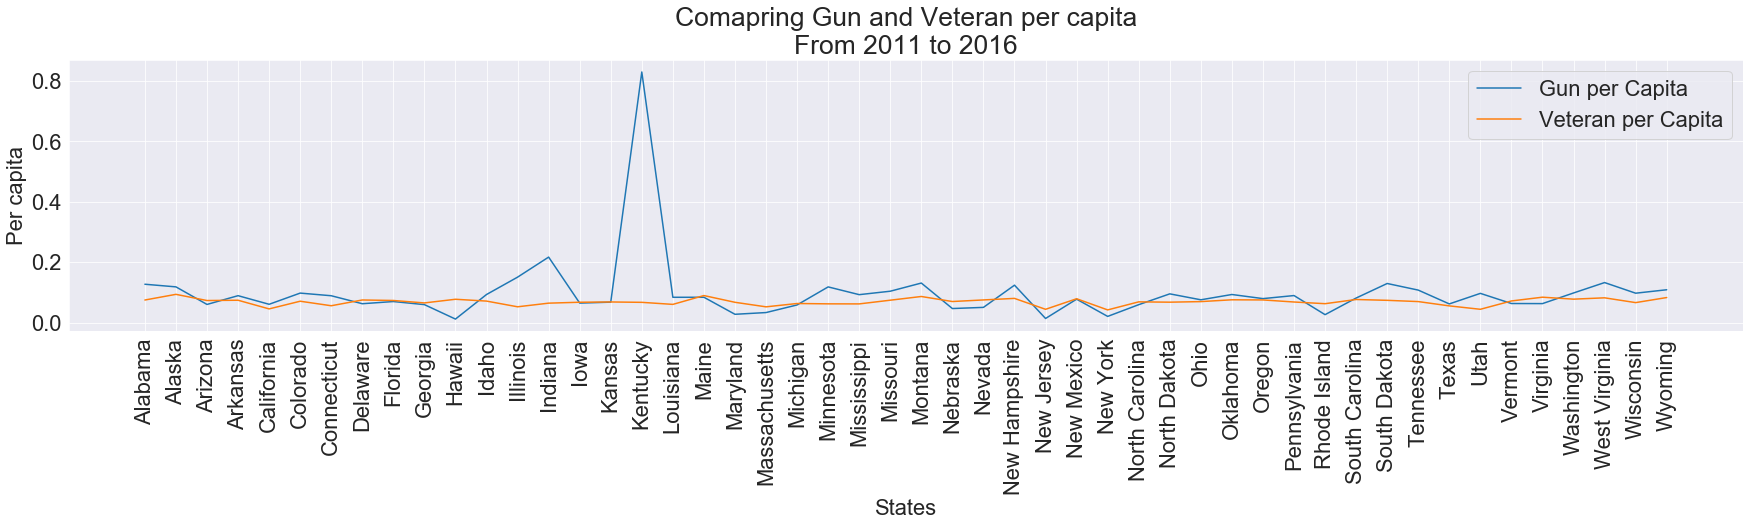

In [92]:
# look at the both set by a line chart to see how they fit together
plt.plot(df_final.state,df_final.gpc_2016, label='Gun per Capita')
plt.plot(df_final.state,df_final.vpc_2011_2015, label='Veteran per Capita')
plt.xlabel('States')
plt.ylabel('Per capita')
plt.title('Comapring Gun and Veteran per capita\nFrom 2011 to 2016')
plt.legend()
plt.xticks(labels,rotation=90);

*The line chart shows thses two variable has strong relations, so lets see by scatter plot*

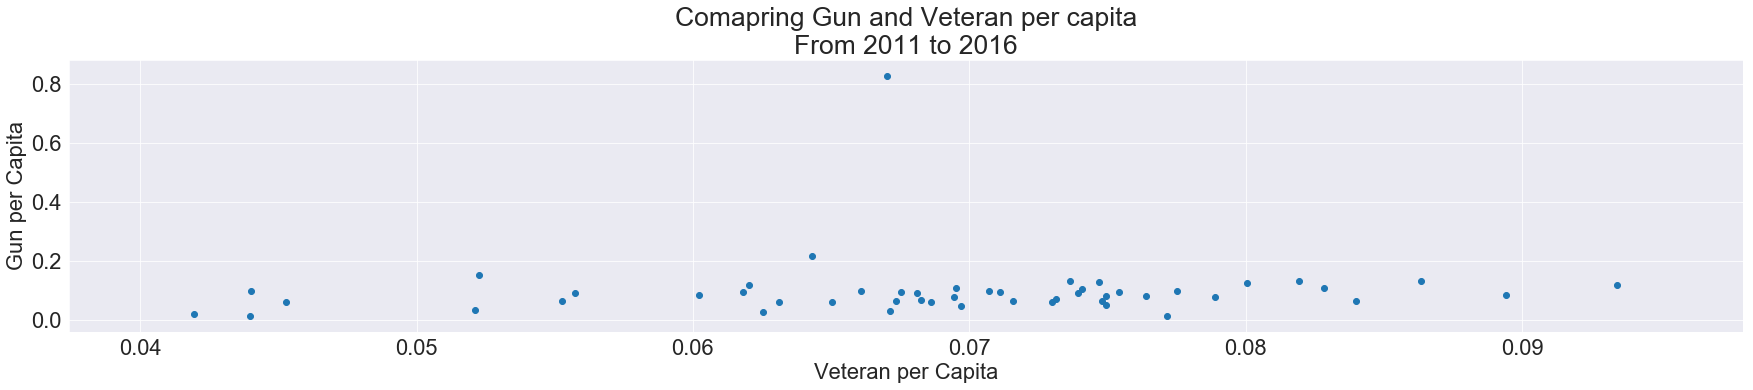

In [93]:
# look at the both set by a line chart to see how they fit together
plt.scatter(df_final.vpc_2011_2015,df_final.gpc_2016)
plt.xlabel('Veteran per Capita')
plt.ylabel('Gun per Capita')
plt.title('Comapring Gun and Veteran per capita\nFrom 2011 to 2016');

*Figures show gun per capita quite related to veteran per capita, except one state, Kentucky, which has out of range gun per capita*

<a id='q5'></a>
##### Question 5: Employee and Payroll relation with Gun
<p>One intresting question, do number of employee and payroll capital for each states have strong effect on gun data in those states? in other word, what happen for gun numbers in total from economical data?</p>
<p>To answer these questions, we follow this way: for employee use use per capita measure and then compaire to gun per capita and and for payroll we use two methods, one per capita measure and second quantitative levels method (as used for question 2 and 4) to see which one give better answer</p>
<p>There is one limitation on emploee and payroll data from census data set, which the data belong 2015 year and no 2016, so with tolerance use the data for comparing gun per capita 2016.</p>

In [94]:
# employee per capita (for lack of population data year 2015, with an approximation use population data of 2016 )
df_final['empc_2015'] = df_final.emp_2015/df_final.population_2016

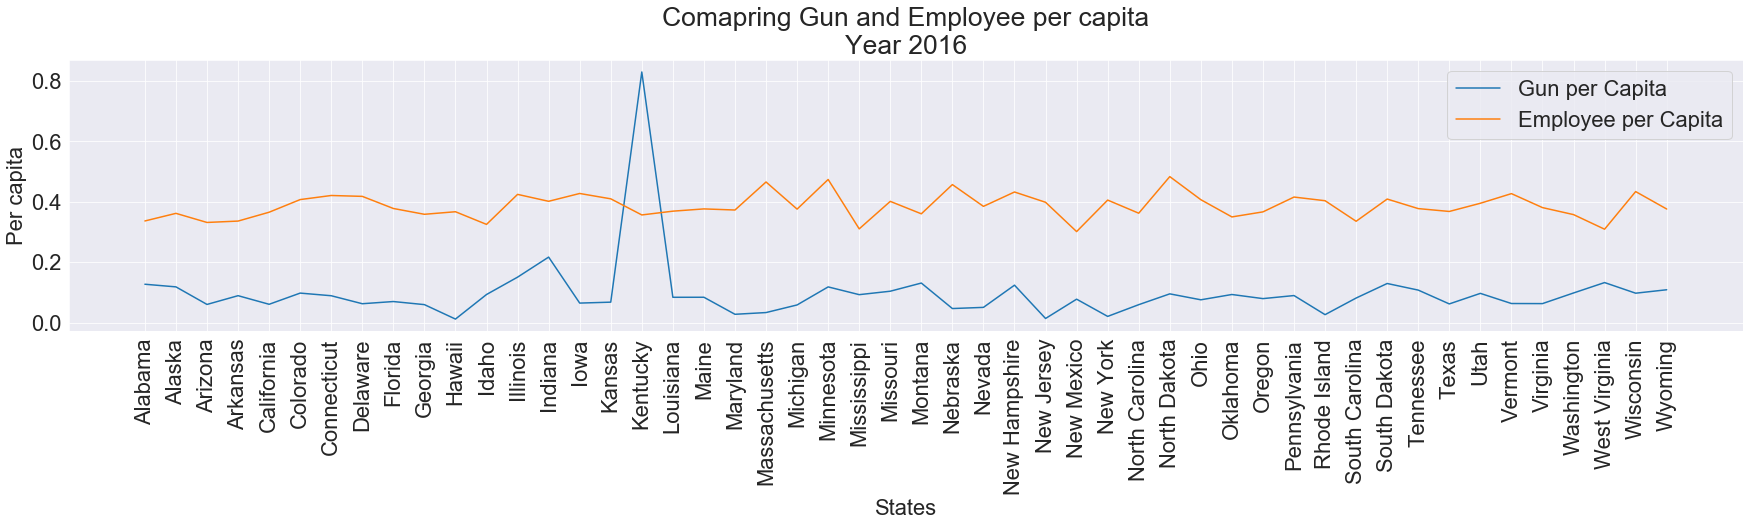

In [95]:
# use a line chart to see dependencies in sets
plt.plot(df_final.state,df_final.gpc_2016, label='Gun per Capita')
plt.plot(df_final.state,df_final.empc_2015, label='Employee per Capita')
plt.xlabel('States')
plt.ylabel('Per capita')
plt.title('Comapring Gun and Employee per capita\nYear 2016')
plt.legend()
plt.xticks(labels,rotation=90);

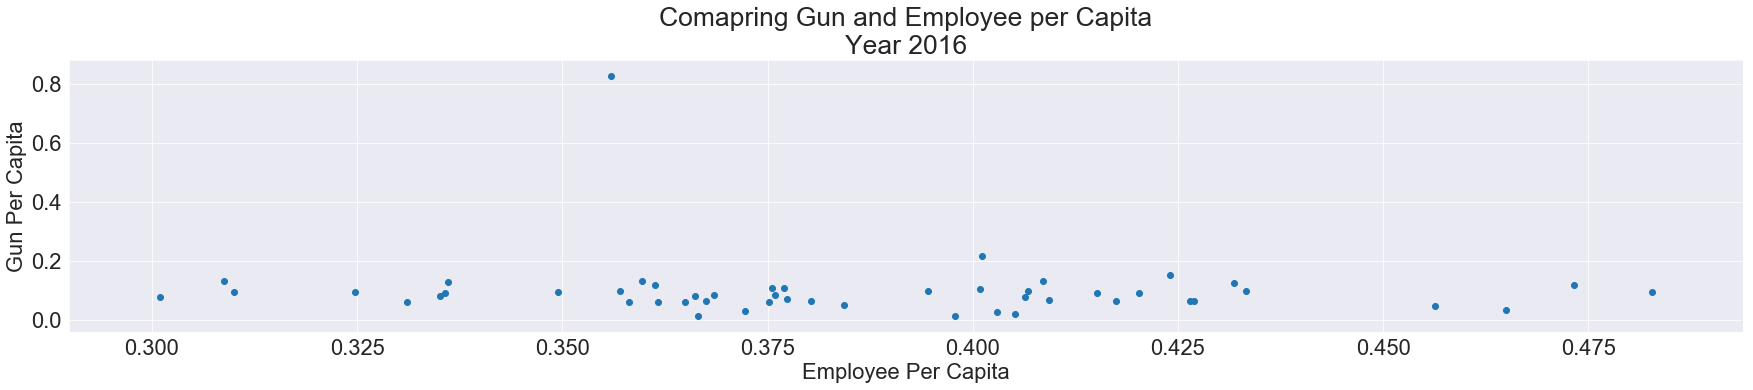

In [96]:
# Figure out the nehavior of two sets by scatter plot
plt.scatter(df_final['empc_2015'],df_final['gpc_2016'],)
plt.xlabel('Employee Per Capita')
plt.ylabel('Gun Per Capita')
plt.title('Comapring Gun and Employee per Capita\nYear 2016');

*<p>The both graph shows, can be say fluctuation in both sets, except out point, 'Kentucky', follow each other.</p>
Let’s figure our payroll and gun relation based two methods as described*

In [97]:
# for payroll, first per capita (for lack of population data year 2015, with an approximation use population data of 2016 )

df_final['ppc_2015'] = df_final.dpayroll_2015/df_final.population_2016

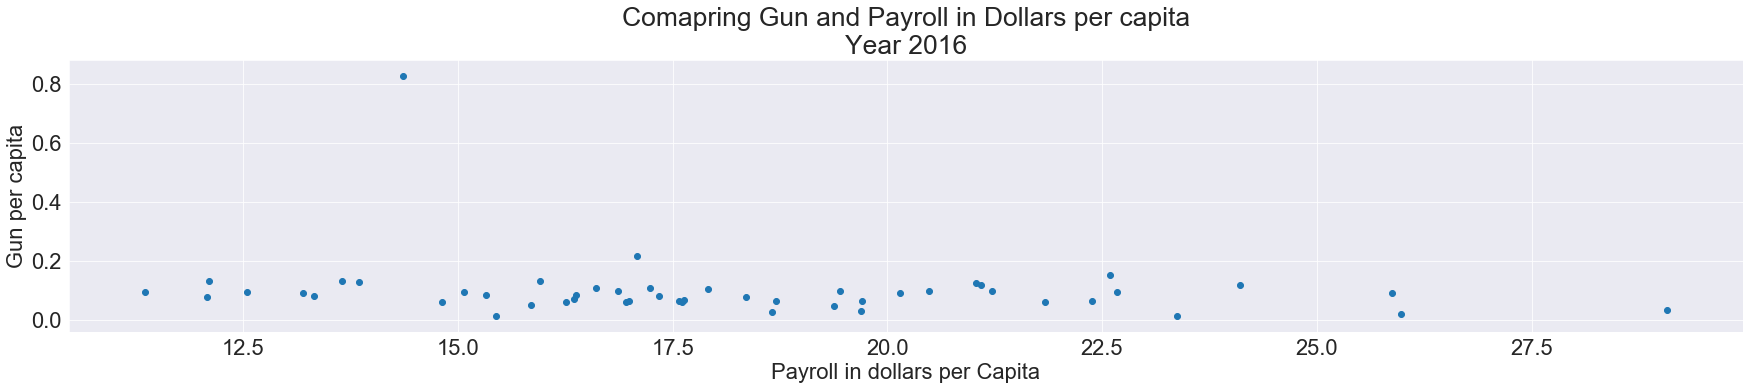

In [98]:
# compaire both data per capita in one scatter chart
plt.scatter(df_final.ppc_2015,df_final.gpc_2016)
plt.ylabel('Gun per capita')
plt.xlabel('Payroll in dollars per Capita')
plt.title('Comapring Gun and Payroll in Dollars per capita\nYear 2016');

*The scatter plot shows data has a direct relation together, but not strong. Does second method also shows this, let's see.*

In [99]:
# second method, quantitative method
df_final.dpayroll_2015.describe()

count    5.000000e+01
mean     1.243008e+08
std      1.557208e+08
min      1.009401e+07
25%      2.587806e+07
50%      6.918848e+07
75%      1.610169e+08
max      8.569542e+08
Name: dpayroll_2015, dtype: float64

In [100]:
# Creating a new column based on payroll quantitative levels
bin_edges_p = [1.009400e+07,2.587806e+07,6.918848e+07,1.610169e+08,8.569543e+08]
df_final['payroll_levels'] = pd.cut(df_final['dpayroll_2015'], bin_edges_p, labels=bin_names)
df_final.payroll_levels.value_counts(normalize=True)

Low                0.26
High               0.26
Medium             0.24
Moderately High    0.24
Name: payroll_levels, dtype: float64

In [101]:
# Find the mean gun per capita of each payroll level with groupby
df_final.groupby(['payroll_levels'])['gpc_2016'].mean()

payroll_levels
High               0.087068
Moderately High    0.146705
Medium             0.098170
Low                0.062644
Name: gpc_2016, dtype: float64

In [102]:
# Find the mean payroll of each gun per capita levels with groupby
df_final.groupby(['gpc_levels'])['dpayroll_2015'].mean()

gpc_levels
High               2.029454e+08
Moderately High    1.345281e+08
Medium             8.100680e+07
Low                7.617944e+07
Name: dpayroll_2015, dtype: float64

*<p>Interesting, average of gun per capita by payroll levels shows in states with 'Moderately High' payroll per capita, there are more gun per capita, but average of payroll by gun per capita levels shows states with 'Medium' gun per capita have more payroll in dollar. So, these two variable coherent together but not strongly.<p>
These two method shows payroll has not strong correlation to gun, based on biggest mean per capita in 'Moderately High' level and the graph.*

In [103]:
df_final.to_csv('df_final2.csv')

<a id='limitations'></a>
## Limitations

Doing this project was along some data limitations and personal challenges, which I number them following:
1. Personal challenges:
    -  When I followed the lessons by instructors, everything seems smooth, easy and understandable. Formulas and code easily and correctly use. But, when I wanted to apply all lesson learned to my project, everything changes, even simplest code turn out to error, so, searching and searching and reading to solve those errors. It was challenging but really necessary. I can understand how Udacity content are valuable and how the instructors are professionals.
    - Dedicating time for doing project. I watch and listen the lessons during the day but finding time for doing project was really hard. I spent some time and late night and next night was everything new for my mind and should start over
2. Project limitations:
    - During analysis process, based on simplification, many of data and variables in both datasets didn't consider and dismiss. So, actually our results is not a validated one and doesn't give us a big picture of cause and effect
    - Lack of census data for year 2015 was limitation which made the process use numbers of year 2016 instant
    - lack of census data in years like gun data, cause we could not do analysis during years and see reliability of the results

<a id='conclusions'></a>
## Conclusions

*Base on the analysis process and limitations, the handson results can be summarized as following:*
1. Between all variable which their relation with gun total statistic, veteran population has the best correlation
2. Employee and payroll have moderate effect on gun numbers
3. Between race population, Hispanic population has stringer effect on gun numbers rather than white and black populations
4. I couldn't find meaningful relation between population growth and gun growth. Difference between these two set are huge and doesn't seems their change does any effect of each other